### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.

1.1) The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.

# Output: F = $w_{3}(x_{2}w_{2} - x_{1}w_{1})$ 

# No non linearities will occur, because this is a linear function 

1.2) Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*

- I would say the data was model well
- 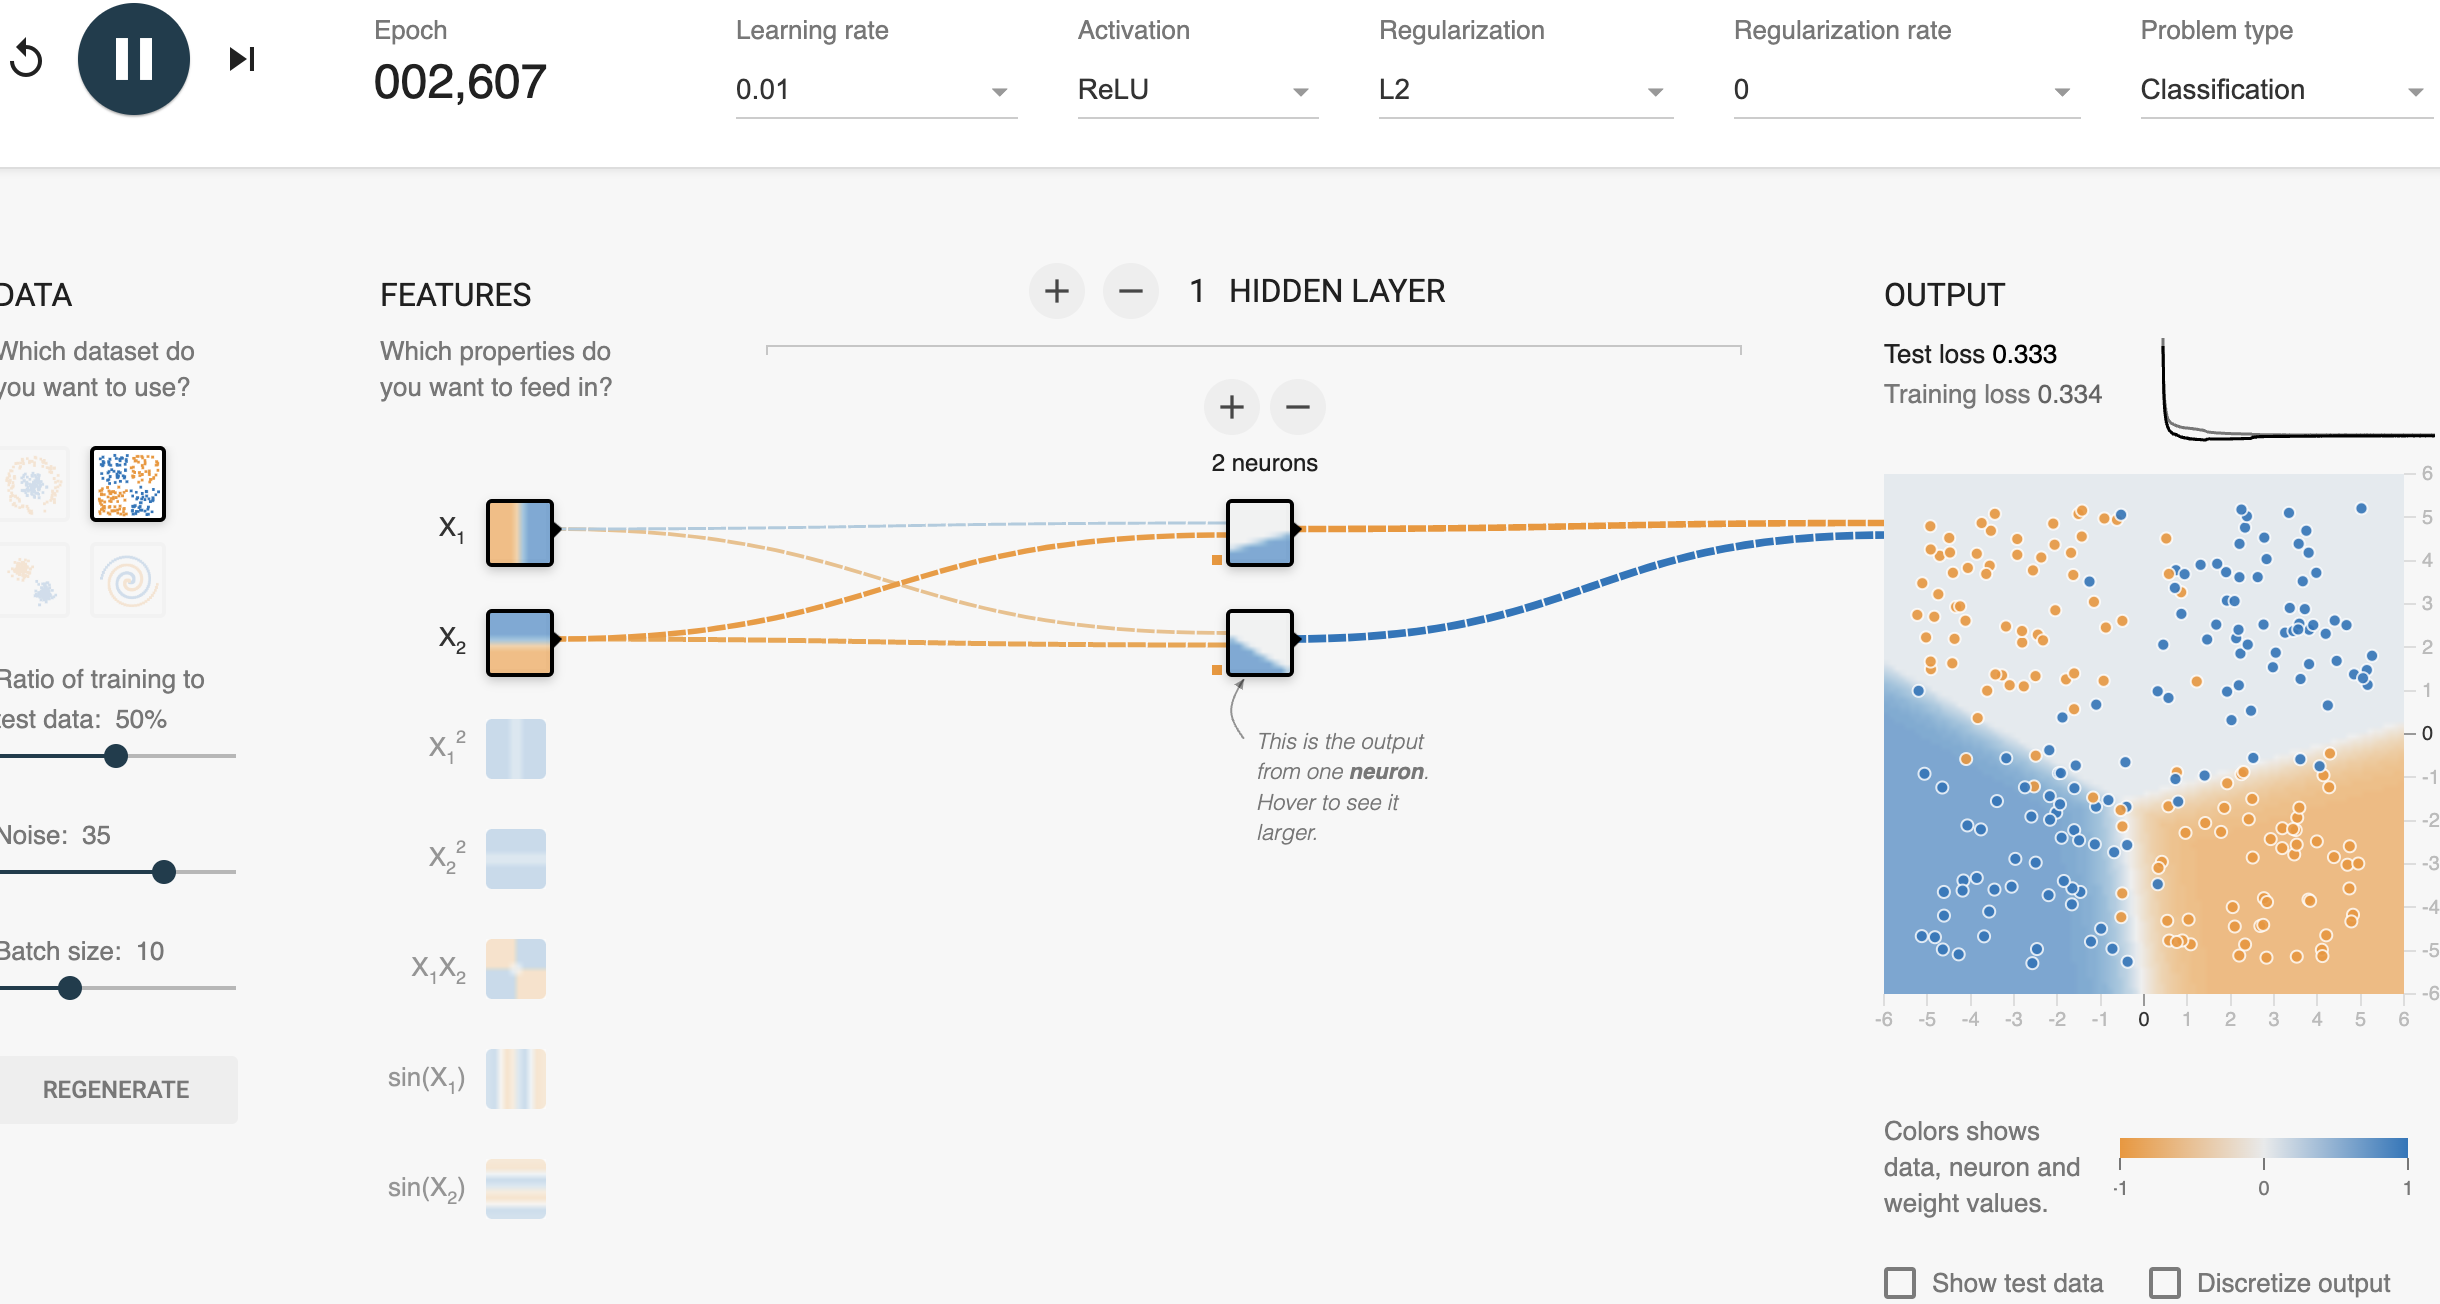

1.3) Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?

- The model improved with more neurons
- 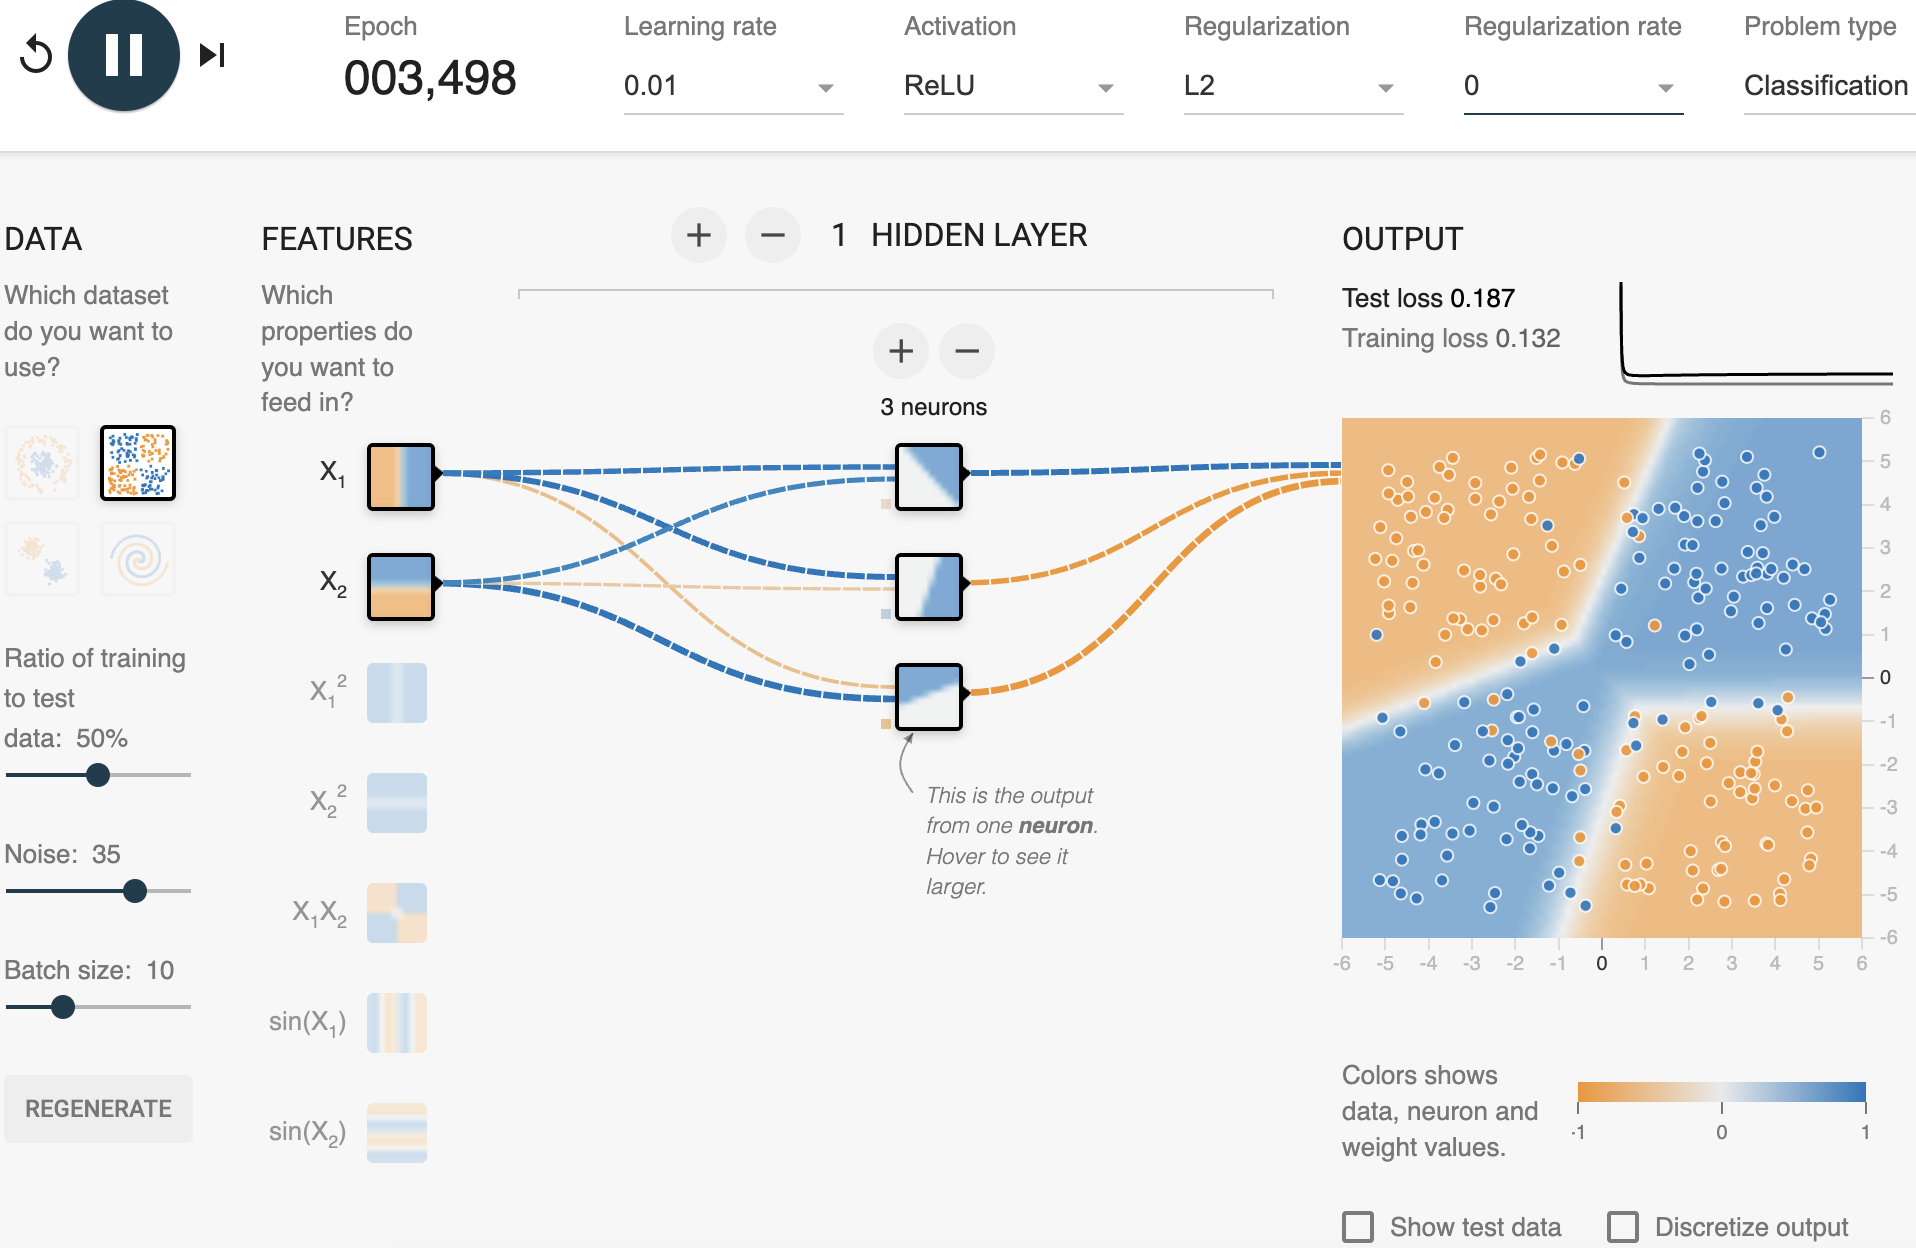

1.4) Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

- This was my best result, I swear I got it with 3 total neurons but could not repeat that result
- 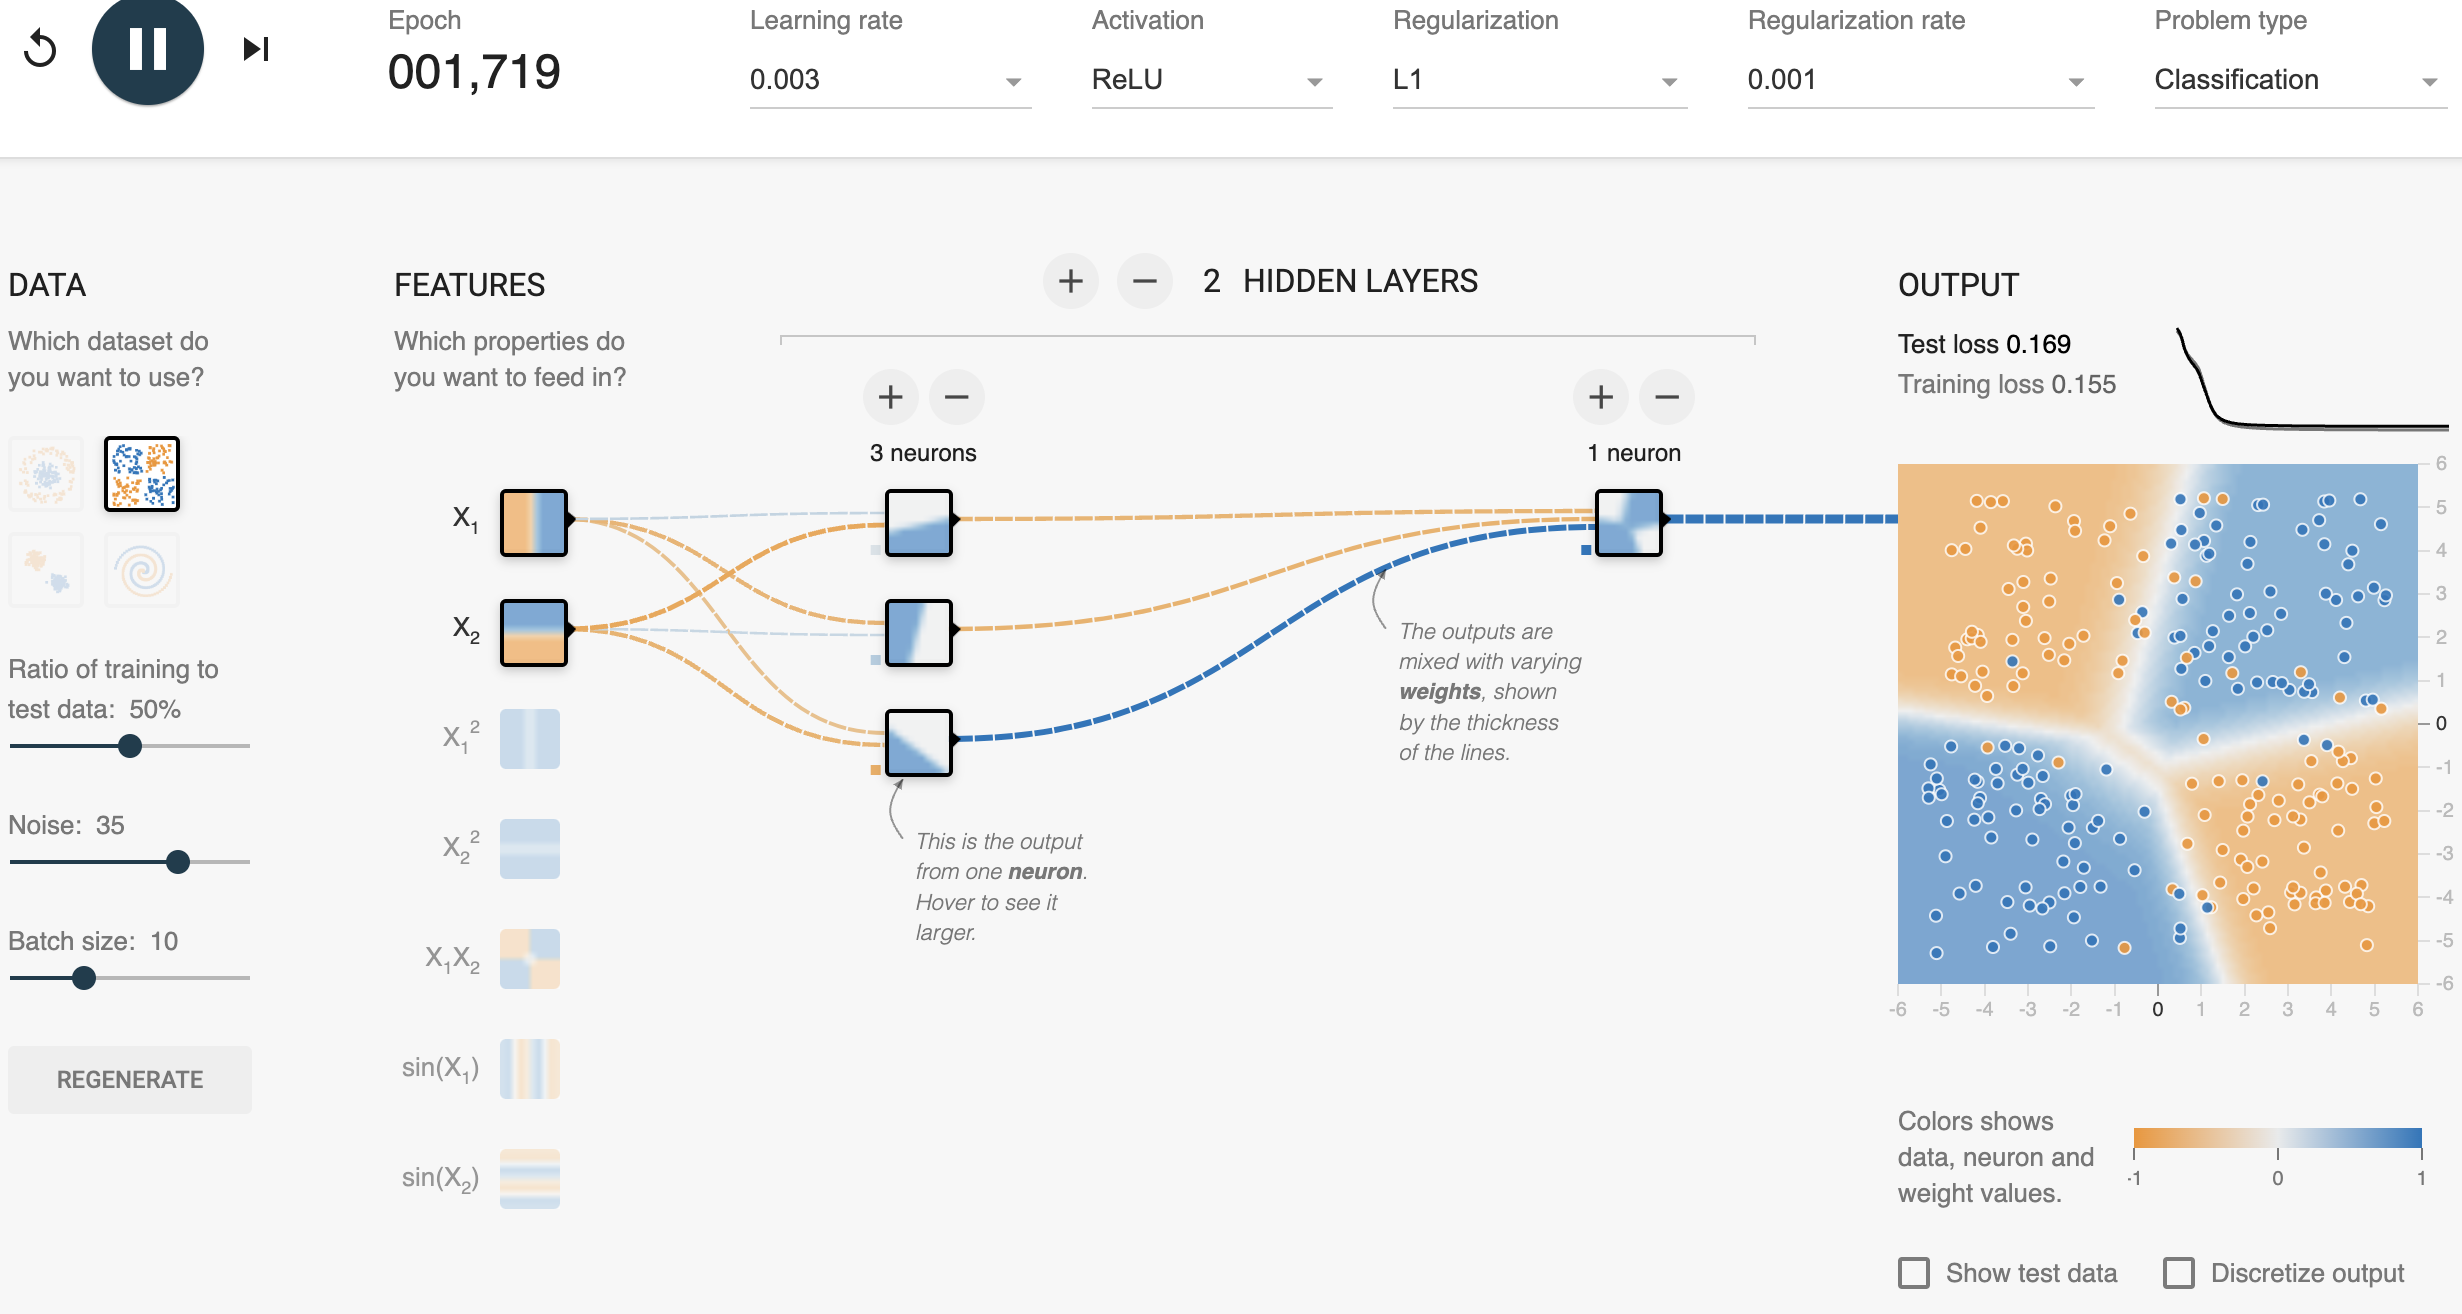

1.5) Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

- Increasing batch size cause quicker convergence, but not much else
- 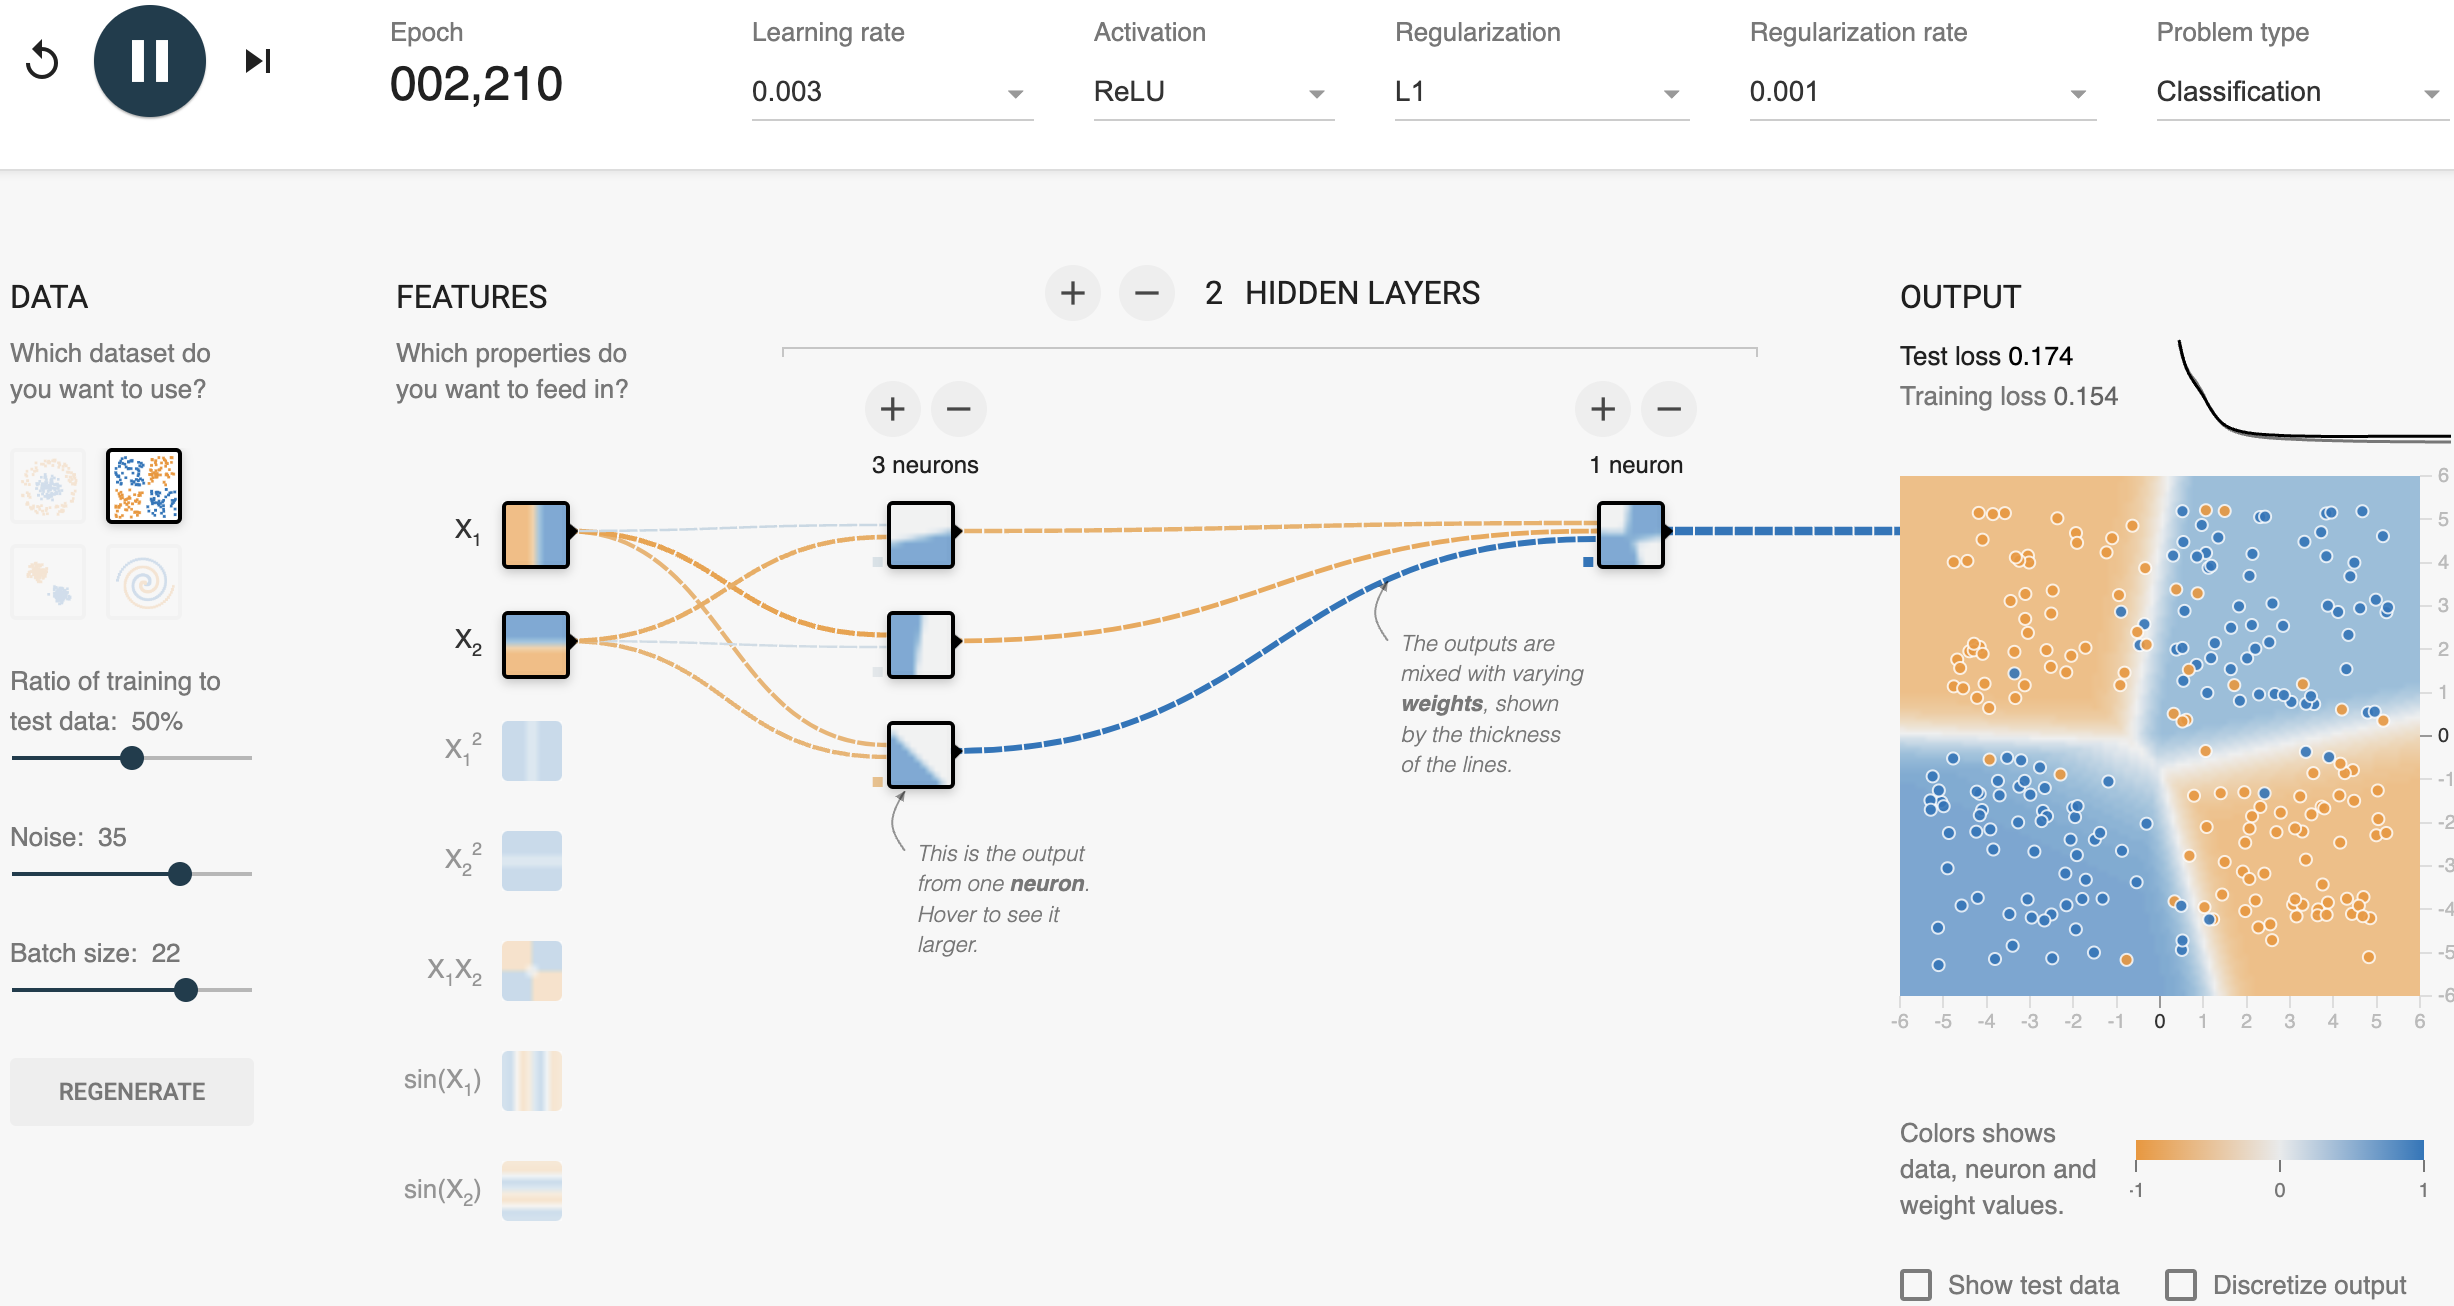

- Following instructions, I found convergence to be slightly faster, but not so fast as to where it is worth adding all of the neurons
- 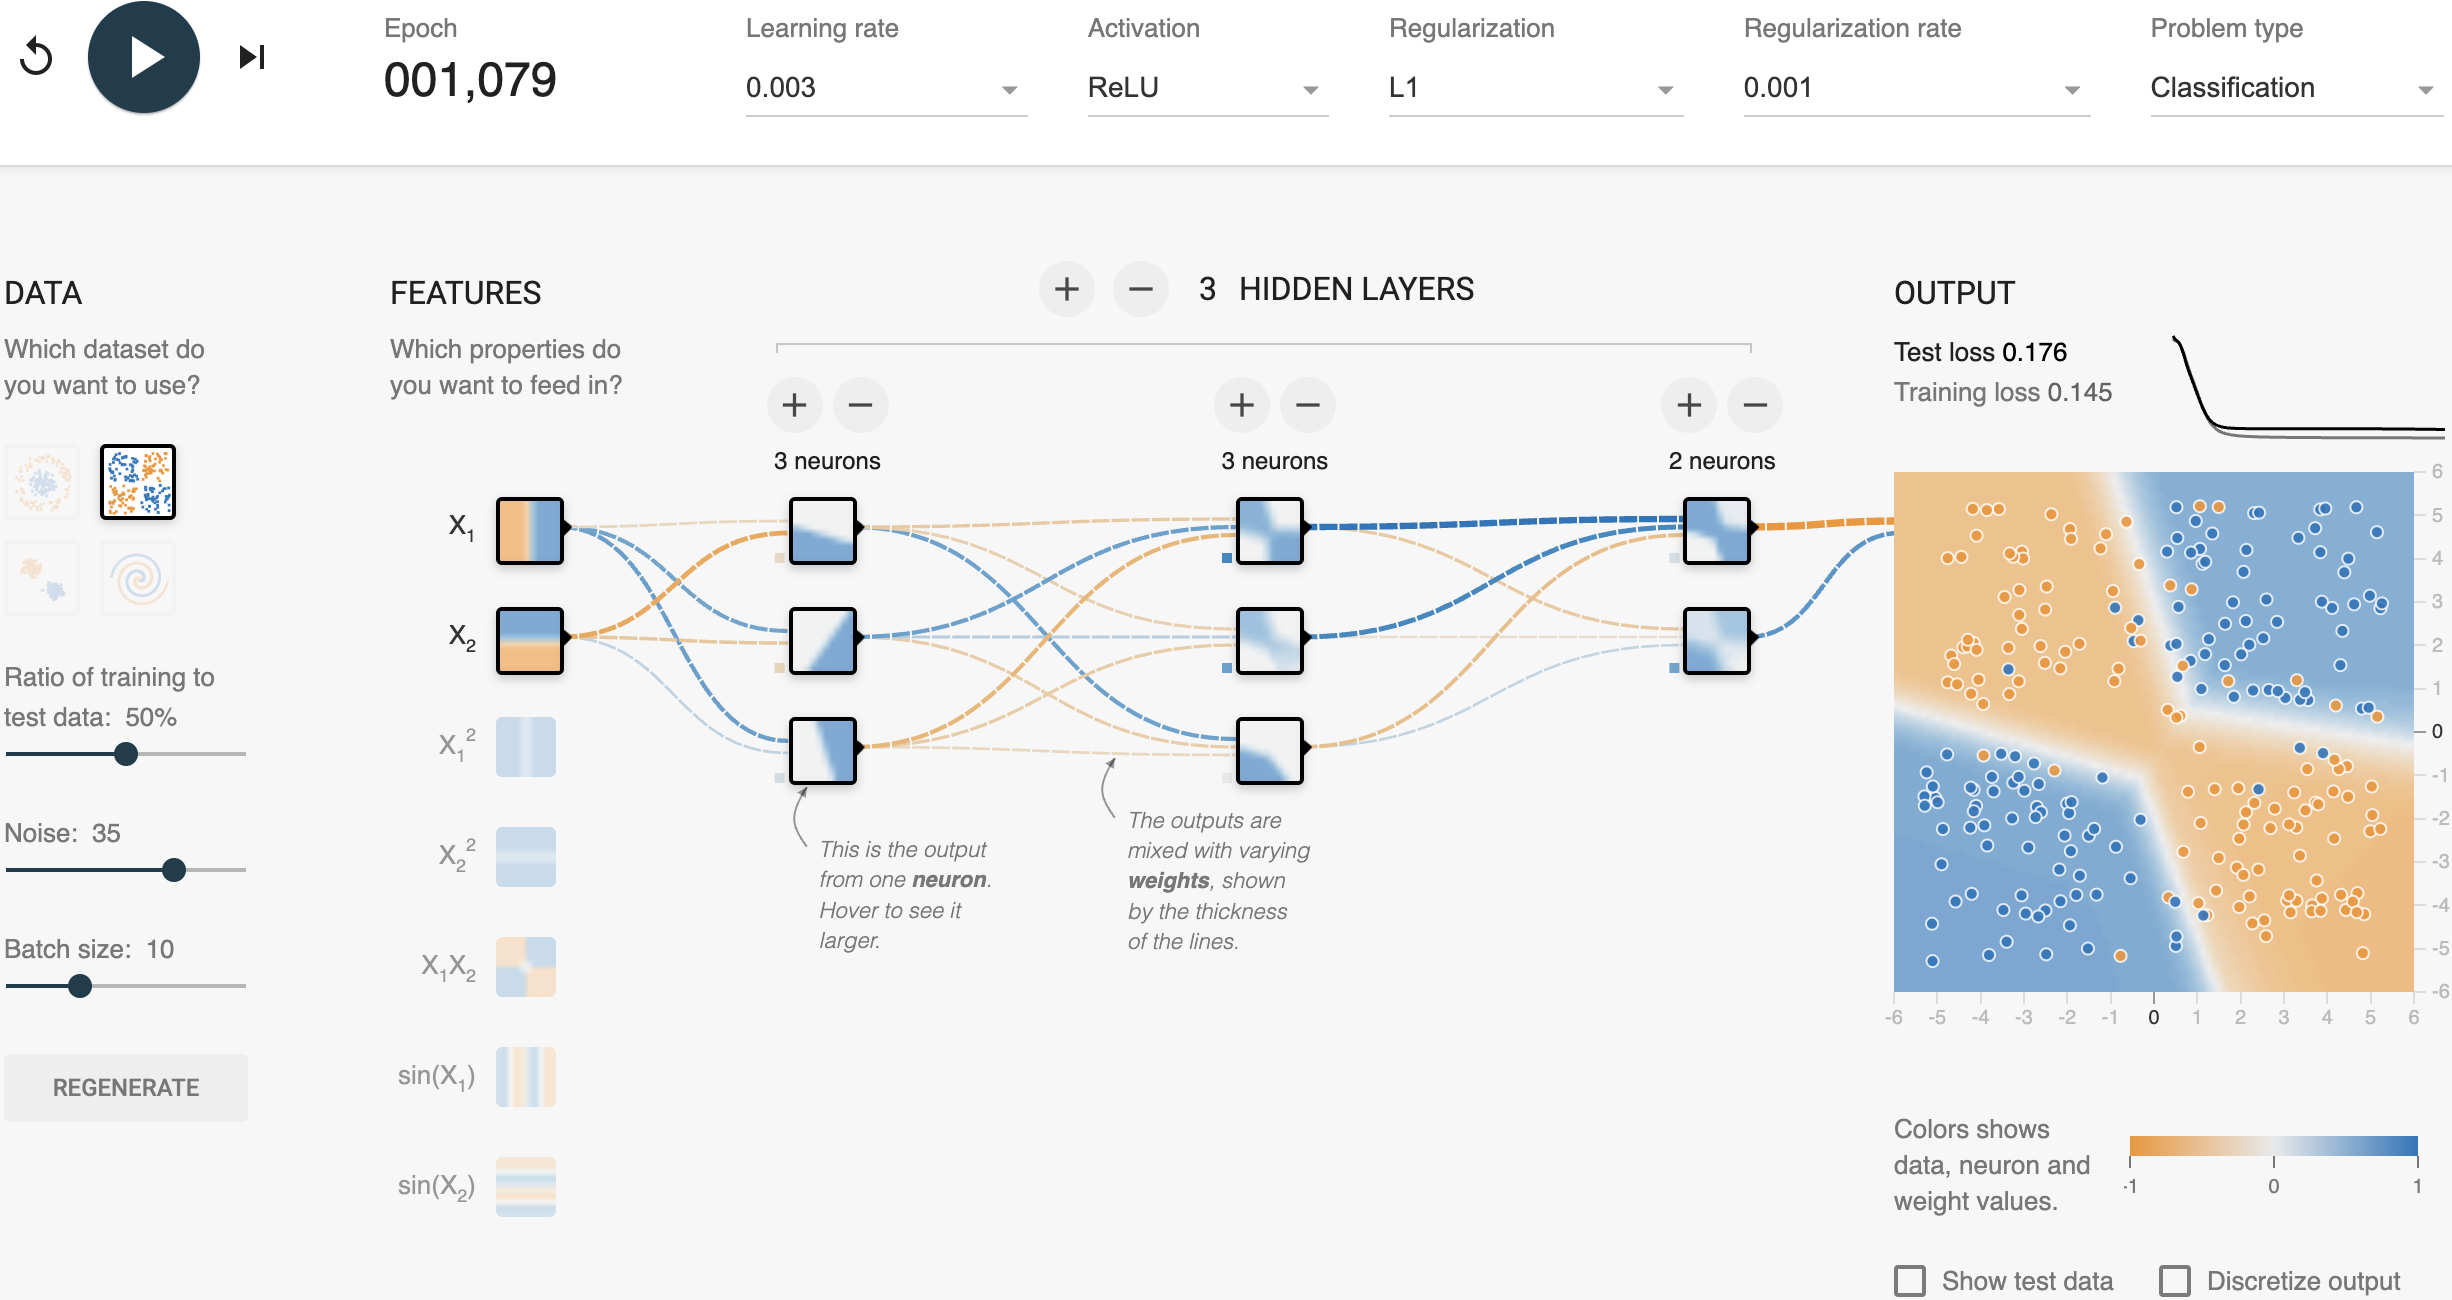

## Problem 2

The first few steps of this problem are the same as last week's homework.

2.1) Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file = np.load('hw_data_cp/hw8_data_NicholasHoward.npy')[::10]

# Create arrays based on color index/ redshifts
col_u_g = file['u'] - file['g']
col_g_r = file['g'] - file['r']
col_r_i = file['r'] - file['i']
col_i_z = file['i'] - file['z']

redshift = file['redshift']
redshift_err = file['redshift_err']
spec_class = file['specClass']

# Separate spectral class based on the type of event, but also make 0s and 1s indicate the type
spec_class[spec_class=='QSO'] = 1
spec_class[spec_class=='GALAXY'] = 0
spec_class = spec_class.astype(np.int64)

del file # Delete file to conserve memory 

2.2) We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.

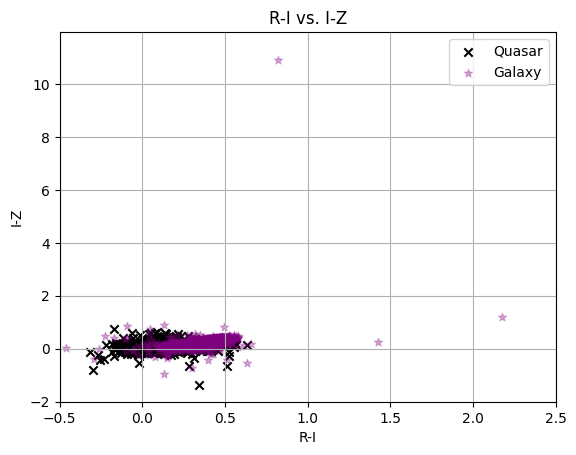

In [2]:
tab_riz = np.column_stack([col_r_i,col_i_z,spec_class]) #Create sudo-table of the two used color indexes (Lazy coding)

# Plot the galaxies and quasars of the color index as you wished. 
plt.scatter(tab_riz[spec_class==1][:,0], tab_riz[spec_class==1][:,1],marker='x',label='Quasar',c='black')
plt.scatter(tab_riz[spec_class==0][:,0], tab_riz[spec_class==0][:,1],marker='*',label='Galaxy',alpha=0.3,c='purple')
plt.legend()
plt.grid()
plt.xlabel('R-I')
plt.ylabel('I-Z')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5-1.5)
plt.title('R-I vs. I-Z');
del tab_riz # Delete table to conserve memory 
# The data points almost completely overlap

2.3) Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).

In [3]:
from sklearn.model_selection import train_test_split as tts

X = np.column_stack([col_r_i,col_i_z,spec_class]) # Turn data into a lazy table
Xtrain, Xtest = tts(X,test_size=0.2,random_state=42) # Test train split data
label_train, label_test = Xtrain[:,-1], Xtest[:,-1] # Separate labels

2.4) Scale your training and testing data to prepare it for the DNN. 

In [4]:
from sklearn import preprocessing

# Scale TTS output
Xtrain_scaled = preprocessing.scale(Xtrain)
Xtest_scaled = preprocessing.scale(Xtest)

# Separate scaled TTS output by data and labels
data_train, data_test = Xtrain_scaled[:,:-1], Xtest_scaled[:,:-1]

2.5) Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 

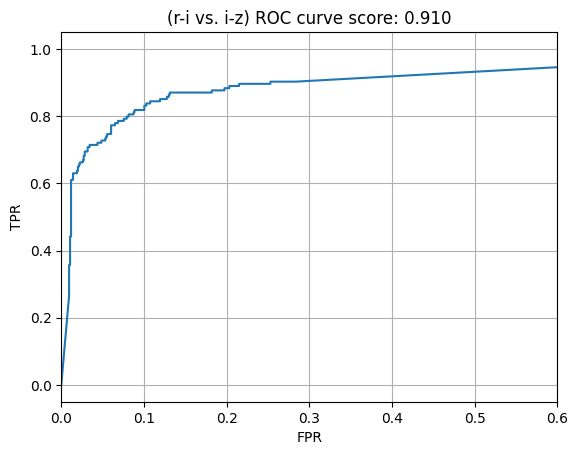

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# scikit-learn's multi-layer perceptron classifier with specified parameters
mlp = MLPClassifier(hidden_layer_sizes=(5,2)
                    ,activation='relu'
                    ,solver='sgd'
                    ,max_iter=1000
                    ,random_state=42)

mlp_fit = mlp.fit(data_train,label_train) # Fit classifier with data
mlp_pred = mlp_fit.predict_proba(data_test)[:,1] # Probability Estimate with the test data
fpr0, tpr0, thresh0 = roc_curve(label_test, mlp_pred) # Get ROC curve parameters by testing the label with our prediction
score0 = roc_auc_score(label_test, mlp_pred) #Get ROC curve score

# Plot the ROC how I like it 
plt.plot(fpr0, tpr0)
plt.xlim(0,0.6)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'(r-i vs. i-z) ROC curve score: {score0:.3f}') # I love f-strings 
plt.grid()
plt.show();

2.6) Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.



In [6]:
from sklearn.model_selection import GridSearchCV

# Search Parameters
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

GSC = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1) # Create cross-validation search grid
GSC_fit = GSC.fit(data_train, label_train) # Fit Crossvalidation to data

print(f'Classification score: {GSC_fit.best_score_} \nBest Parameters: \n{GSC_fit.best_params_}')

/Users/howarn1/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/howarn1/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/howarn1/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (

Classification score: 0.9355 
Best Parameters: 
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}


2.7) Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

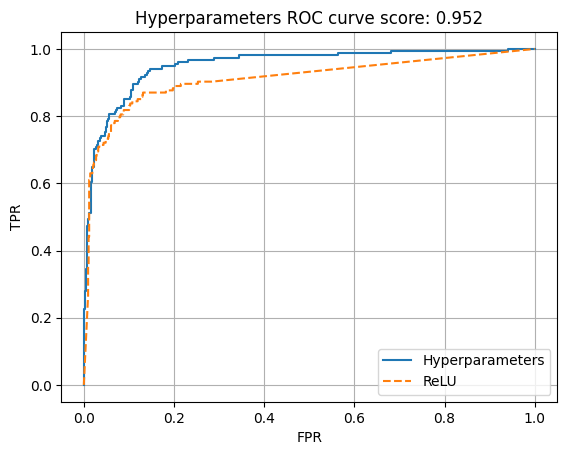

In [7]:
best_params = list(GSC_fit.best_params_.values()) # Turn best paramters into iterable list

mlp = MLPClassifier(activation=best_params[0],
                   hidden_layer_sizes=best_params[1],
                   max_iter=best_params[2],
                   random_state=best_params[3],
                   solver=best_params[4]) # Set DNN with best parameters

mlp_fit = mlp.fit(data_train,label_train) # Fit classifier with data
mlp_pred = mlp_fit.predict_proba(data_test)[:,1] # Probability Estimate with the test data

fpr, tpr, thresh = roc_curve(label_test, mlp_pred) # Get ROC curve parameters by testing the label with our prediction
score = roc_auc_score(label_test, mlp_pred) #Get ROC curve score

# Plot the ROC how I like it 
plt.plot(fpr, tpr, label = 'Hyperparameters')
plt.plot(fpr0, tpr0, label = 'ReLU', ls='--', )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title(f'Hyperparameters ROC curve score: {score:.3f}') # I love f-strings 
plt.grid()
plt.show();